In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#instance-based+schema-based
with open('accuracy.p', 'rb') as file:
    all_acc_1 = pickle.load(file)
#Федеративное обучение / instance-based+schema-based
with open('accuracy_fed.p', 'rb') as file:
    fed_acc = pickle.load(file)

In [5]:
#с тэгами
with open('accuracy_f.p', 'rb') as file:
    all_acc_f = pickle.load(file)
#Федеративное обучение / с тэгами
with open('accuracy_fed_f.p', 'rb') as file:
    fed_acc_f = pickle.load(file)

In [10]:
#с1
with open('accuracy_c1.p', 'rb') as file:
    acc_c = pickle.load(file)

In [8]:
#Федеративное обучение / с1
with open('accuracy_fed_c1.p', 'rb') as file:
    fed_acc_c = pickle.load(file)

In [15]:
def get_acc_fed(fed_acc,model_name,epoch=10):
    mean_acc = []
    i = 0
    for acc in fed_acc:
        mean_acc.append(np.mean(acc[f'{model_name}_{i % epoch + 1}']))
        i+=1
    max_acc = []
    for j in range(0,len(mean_acc)-epoch+1, epoch):
        max_acc.append(max(mean_acc[j:j+epoch]))
    return max_acc

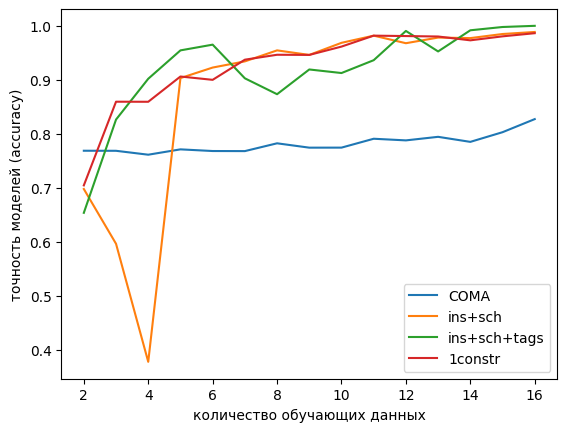

In [25]:
y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = [np.mean(i['AOA_4']) for i in all_acc_1]

y3 = [np.mean(i['AOA_6_f']) for i in all_acc_f]
y4 = [np.mean(i['AOA_6']) for i in acc_c]
x = list(range(2,17))
plt.plot(x, y1[:15])
plt.plot(x, y2[:15])
plt.plot(x, y3[:15])
plt.plot(x, y4[:15])
plt.legend(['COMA','ins+sch', 'ins+sch+tags', '1constr'])
ax = plt.subplot()
ax.set_xlabel('количество обучающих данных')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

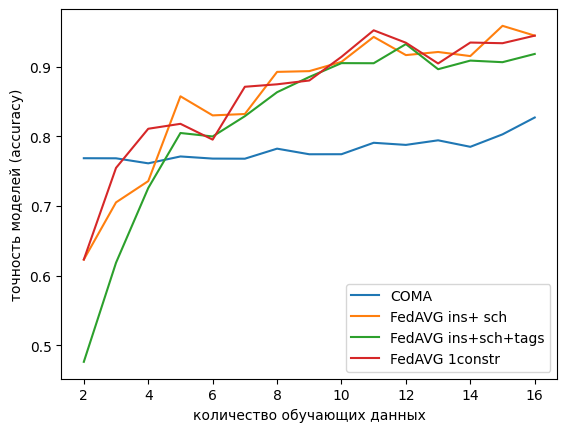

In [26]:
y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = get_acc_fed(fed_acc,"AOA_5")
y3 = get_acc_fed(fed_acc_f,"AOA_6")
y4 = get_acc_fed(fed_acc_c,"AOA_6")

x = list(range(2,17))
plt.plot(x, y1[:15])
plt.plot(x, y2[:15])
plt.plot(x, y3[:15])
plt.plot(x, y4[:15])

plt.legend(['COMA','FedAVG ins+ sch',
            'FedAVG ins+sch+tags','FedAVG 1constr'])
ax = plt.subplot()
ax.set_xlabel('количество обучающих данных')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()

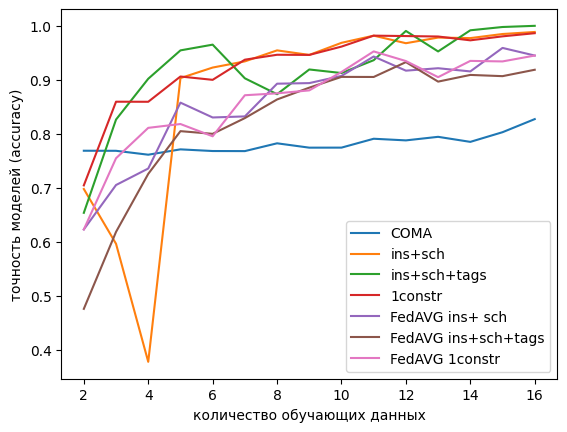

In [27]:


y1 = [np.mean(i['COMA']) for i in all_acc_1]
y2 = [np.mean(i['AOA_4']) for i in all_acc_1]

y3 = [np.mean(i['AOA_6_f']) for i in all_acc_f]
y4 = [np.mean(i['AOA_6']) for i in acc_c]

y5 = get_acc_fed(fed_acc,"AOA_5")
y6 = get_acc_fed(fed_acc_f,"AOA_6")
y7 = get_acc_fed(fed_acc_c,"AOA_6")

x = list(range(2,17))
plt.plot(x, y1[:15])
plt.plot(x, y2[:15])
plt.plot(x, y3[:15])
plt.plot(x, y4[:15])
plt.plot(x, y5[:15])
plt.plot(x, y6[:15])
plt.plot(x, y7[:15])

plt.legend(['COMA','ins+sch', 'ins+sch+tags', '1constr','FedAVG ins+ sch',
            'FedAVG ins+sch+tags','FedAVG 1constr'])
ax = plt.subplot()
ax.set_xlabel('количество обучающих данных')
ax.set_ylabel('точность моделей (accuracy)')
plt.show()